# Titanic: Aprendizaje Automático a Partir de Desastres 
**Maestría en Ciencia de Datos - FDA I**

* Alejandra Ruiz
* Daniel Martinez
* Juan Camilo Vergara
* Felipe Montenegro

## Preparación previa de los datos

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Carga de la información del conjunto de prueba

'''Se lleva a cabo un merge de la información del conjunto de prueba y las etiquetas de las predicciones'''

data_test = pd.read_csv('./dataset/test.csv')
data_survived = pd.read_csv('./dataset/survived.csv')

data_test_new = pd.merge(data_test, data_survived, on='PassengerId')
data_test_merged = data_test.merge(data_survived, on='PassengerId', how='outer', indicator=True)
print({
	"right_only": len(data_test_merged[data_test_merged['_merge'] == 'right_only']),
	"left_only": len(data_test_merged[data_test_merged['_merge'] == 'left_only']),
	"both": len(data_test_merged[data_test_merged['_merge'] == 'both'])
})
data_test_merged.drop('_merge', axis=1, inplace=True)

{'right_only': 0, 'left_only': 0, 'both': 418}


In [28]:
data_test_merged

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


### **1.Limpieza y EDA**

In [29]:
#Lectura del data set

df_titanic = pd.read_csv("dataset/train.csv")

In [30]:
#Revisión de la estructura de la base de datos

df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#Análisis de los tipos de datos

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Análisis de Registros duplicados**

In [32]:
duplicados = df_titanic.duplicated('PassengerId').sum()

print("El número de registros duplicados por ID de pasajero es: ", duplicados)

El número de registros duplicados por ID de pasajero es:  0


**Análisis de Datos Nulos**

In [33]:
#Identificación de datos nulos en la BD

print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Análisis:** se identificaron un total de 2 variables con una cantidad importante de datos faltantes, estas corresponden a "Age" (177 valores nulos) y "Cabin" (687).

In [34]:
#Manejo de datos nulos para la variable edad. Se lleva a cabo la imputación por la mediana

df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/3459893971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)


**Análisis**: se llevó a cabo la imputación de los valores nulos de la variable edad a través de la mediana, teniendo en cuenta que esta medida de tendencia central es robuzta frente a los valores atípicos, a diferencia de la media que si se puede ver afectada por este tipo de anomalías en los datos.

In [35]:
#Manejo de datos nulos para la variable Embarked

df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/4099903010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)


**Análisis**: teniendo en cuenta que solamente se identificó la presencia de dos valores nulos y al tratarse de una variable categórica, se propuso la imputación de los valores faltantes a través de la moda de la característica evaluada.

In [36]:
# La variable Cabin se eliminará del Dataset debido a una alta presencia de datos nulos. 

df_titanic.drop(columns='Cabin', inplace=True)


**Análisis:** en este caso, en la variable Cabin el 77% de la información corresponde a datos faltantes. Por tanto, puede ser poco relevante para el análisis posterior. Adicionalmente, si se imputa el 77% de dicha variable se podría presentar un problema de sesgo a las estimaciones.

In [37]:
#Validación de cantidad de nulos después de la limpieza.

print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Estadísticas Descriptivas**

In [38]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Análisis**: 

PENDIENTE

### **Análisis Gráfico**

Se procederá a realizar un análisis de la relación que existe entre los atributos de los pasajeros y la información asociada a la supervivencia de los mismos. 

**Distribución de la edad de los pasajeros**

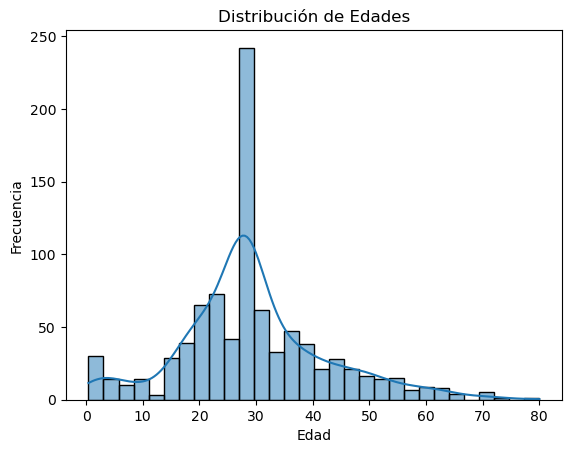

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de las edades de los pasajeros


sns.histplot(df_titanic['Age'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Análisis:**

PENDIENTE

**Distribución de la edad de los pasajeros según sexo**

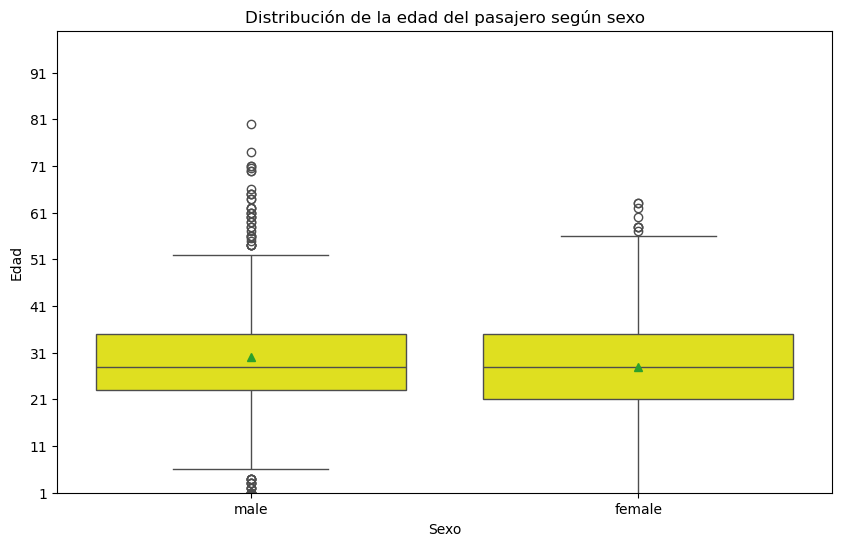

In [40]:
#Identificación de la distribución de las edades de los pasajeros según el género del mismo

# Tamaño del gráfico

plt.figure(figsize=(10, 6))

# Creación del boxplot

boxplot_edades = sns.boxplot(x=df_titanic['Sex'], y=df_titanic['Age'], color="yellow", showmeans=True)

# Etiquetas y titulos

boxplot_edades.set_xlabel('Sexo')
boxplot_edades.set_ylabel('Edad')
boxplot_edades.set_ylim(1, 100)
boxplot_edades.set_yticks(range(1, 100, 10))
boxplot_edades.set_title('Distribución de la edad del pasajero según sexo')

# Establecemos la etiquetas en años


plt.show()

**Análisis**

PENDIENTE

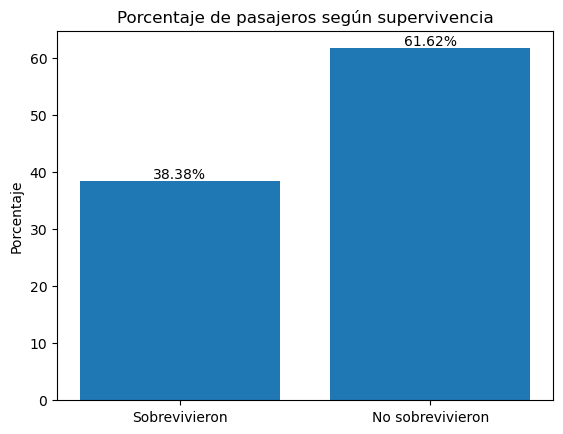

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el porcentaje de sobrevivientes y no sobrevivientes
survived_percentage = (df_titanic['Survived'].sum() / len(df_titanic)) * 100
not_survived_percentage = 100 - survived_percentage

# Crear el gráfico de barras con un solo bar
plt.bar(['Sobrevivieron', 'No sobrevivieron'], [survived_percentage, not_survived_percentage])

# Agregar etiquetas porcentuales a cada barra
for i, percentage in enumerate([survived_percentage, not_survived_percentage]):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.ylabel('Porcentaje')
plt.title('Porcentaje de pasajeros según supervivencia')
plt.show()

**Análisis:**

/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/914114384.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/914114384.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/914114384.py:16: FutureWarning: S

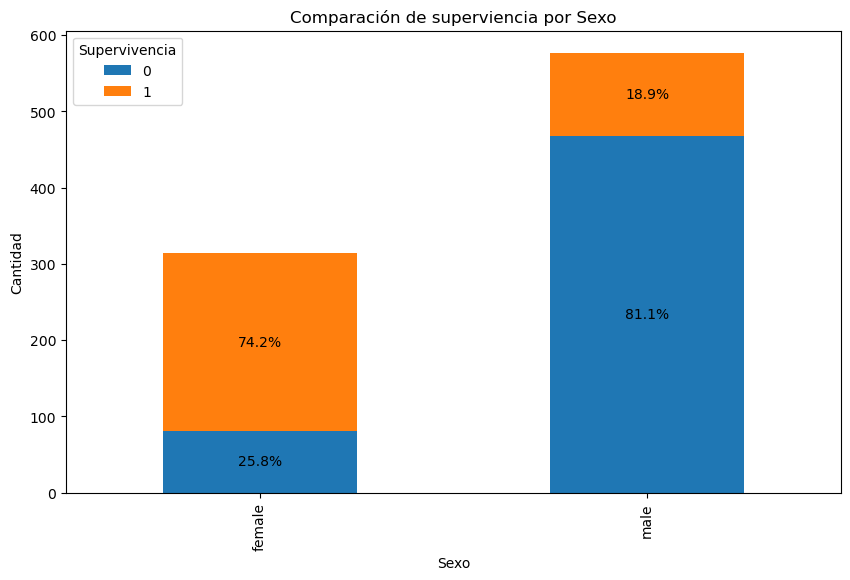

In [42]:
grouped_data = df_titanic.groupby(['Sex', 'Survived']).size().unstack()

percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Comparación de superviencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
    ax.bar_label(container, labels=labels, label_type='center')

# Mostrar el gráfico
plt.show()

**Análisis**

PENDIENTE

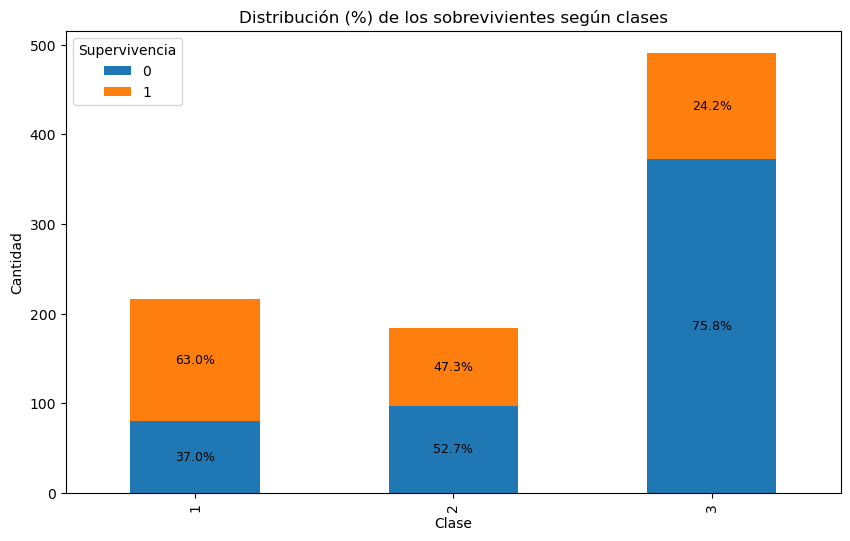

In [43]:
# Agrupar por clase y supervivencia y contar las ocurrencias
grouped_data = df_titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Calcular porcentajes
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Distribución (%) de los sobrevivientes según clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    # Obtener los índices del DataFrame agrupado
    index = grouped_data.index
    for i, v in enumerate(container):
        # Obtener el índice actual
        idx = index[i]
        # Obtener el valor del porcentaje correspondiente
        height = v.get_height()
        if height > 0:
            percentage = height / grouped_data.loc[idx].sum() * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (v.get_x() + v.get_width() / 2, v.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='black')

# Mostrar el gráfico
plt.show()

**Análisis:** PENDIENTE

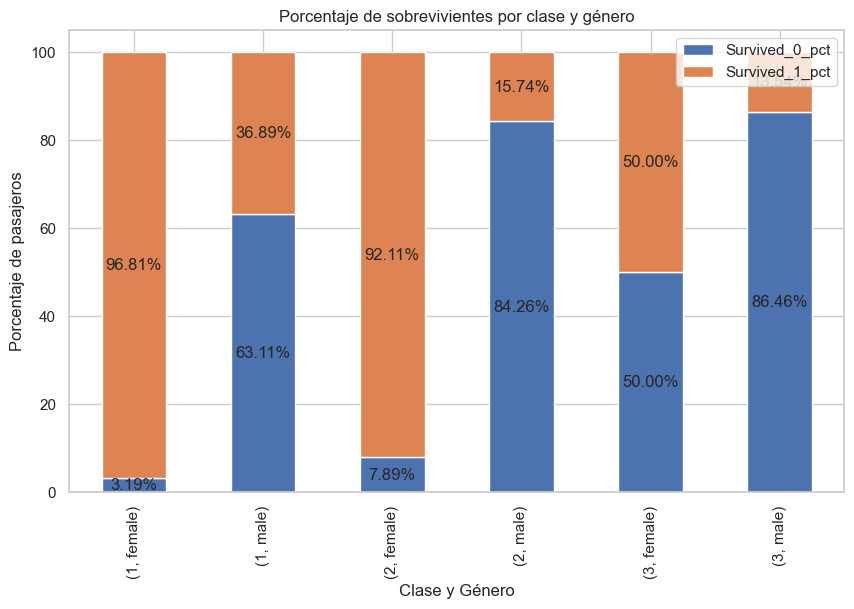

In [44]:
# Calcular la tabla de contingencia sin incluir la fila y columna 'All'
cross_tab = pd.crosstab([df_titanic.Pclass, df_titanic.Sex], df_titanic.Survived)

# Calcular los totales de pasajeros para cada grupo de Pclass y Sex
total_pasajeros_grupo = cross_tab.sum(axis=1)

# Crear una tabla que muestre los totales de pasajeros y los sobrevivientes y no sobrevivientes para cada grupo
tabla_pasajeros = pd.concat([total_pasajeros_grupo, cross_tab], axis=1)
tabla_pasajeros.columns = ['Total', 'Survived_0', 'Survived_1']

# Calcular los porcentajes de sobrevivencia para cada grupo
tabla_pasajeros['Survived_0_pct'] = (tabla_pasajeros['Survived_0'] / tabla_pasajeros['Total']) * 100
tabla_pasajeros['Survived_1_pct'] = (tabla_pasajeros['Survived_1'] / tabla_pasajeros['Total']) * 100

# Definir colores personalizados
colores = ['#4C72B0', '#DD8452']  # Azul oscuro y naranja oscuro

# Graficar los porcentajes de sobrevivencia
sns.set(style="whitegrid")
ax = tabla_pasajeros[['Survived_0_pct', 'Survived_1_pct']].plot(kind='bar', stacked=True, color=colores, figsize=(10, 6))

# Agregar etiquetas de porcentaje para cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*0.5), ha='center', va='center')

# Configuración del gráfico
plt.title('Porcentaje de sobrevivientes por clase y género')
plt.xlabel('Clase y Género')
plt.ylabel('Porcentaje de pasajeros')

# Mostrar el gráfico
plt.show()

**Análisis**

PENDIENTE

**Análisis del comportamiento de la tasa de supervivencia según la clase**

In [45]:
pd.crosstab(df_titanic.Pclass, df_titanic.Survived, margins=True).style.background_gradient(cmap='plasma')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [46]:
print("Porcentaje de pasajeros sobrevivientes según clase") 

print("Clase 1 - Alta : ", df_titanic.Survived[df_titanic.Pclass == 1].sum()/df_titanic[df_titanic.Pclass == 1].Survived.count())
print("Clase 2 - Media: ", df_titanic.Survived[df_titanic.Pclass == 2].sum()/df_titanic[df_titanic.Pclass == 2].Survived.count())
print("Clase 3 - Baja : ", df_titanic.Survived[df_titanic.Pclass == 3].sum()/df_titanic[df_titanic.Pclass == 3].Survived.count())

Porcentaje de pasajeros sobrevivientes según clase
Clase 1 - Alta :  0.6296296296296297
Clase 2 - Media:  0.47282608695652173
Clase 3 - Baja :  0.24236252545824846


/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


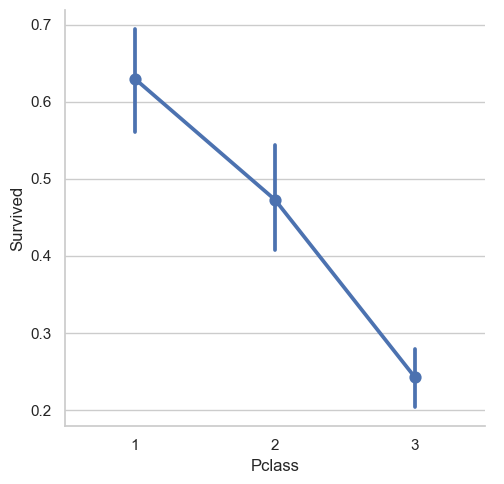

In [47]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df_titanic)
plt.show()

**Análisis:**

**Análisis de la Tasa de Supervivencia según Punto de Embarque**

/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/835466059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Survived', col='Embarked', kind='count', data=df_titanic, palette='Set1')
/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


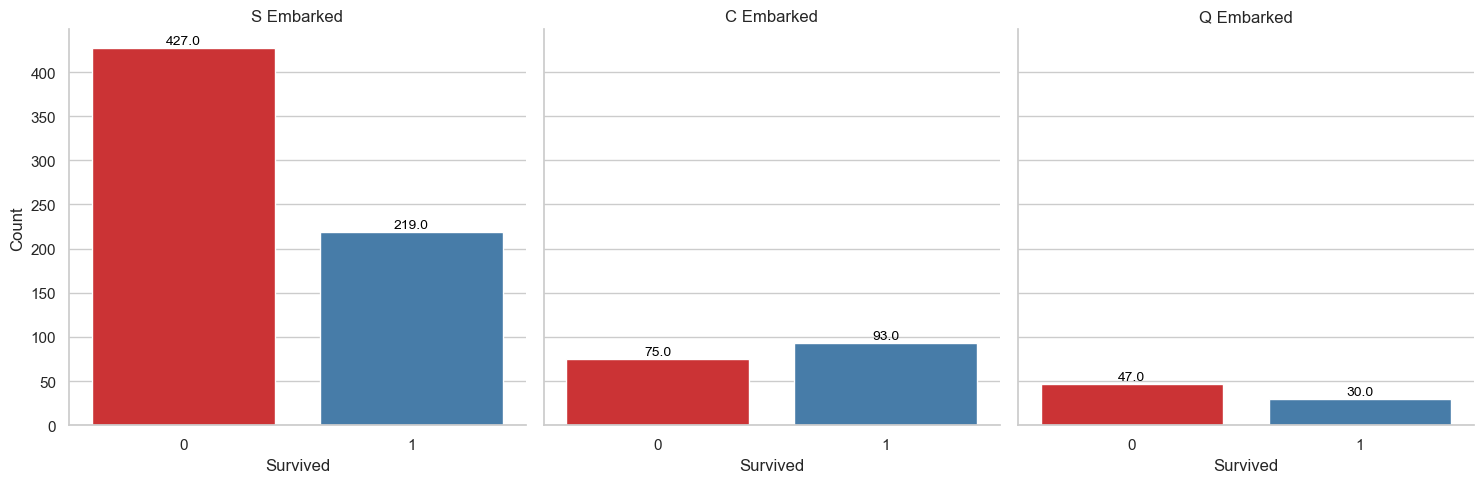

In [48]:
# Configurar el estilo y los colores
sns.set(style="whitegrid", palette="pastel")

# Crear el gráfico con barras de colores distintos para cada categoría de Embarked
g = sns.catplot(x='Survived', col='Embarked', kind='count', data=df_titanic, palette='Set1')

# Ajustar las etiquetas
g.set_axis_labels("Survived", "Count")
g.set_titles("{col_name} Embarked")

# Añadir etiquetas con la cantidad de registros en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Mostrar el gráfico
plt.show()

Estos códigos representan los puertos de embarque respectivos de los pasajeros en el Titanic. Cada pasajero fue registrado con el puerto de donde embarcó en su viaje.
- C: Cherbourg
- Q: Queenstown
- S: Southampton

**Análisis según Punto de Embarque y Sexo**

/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


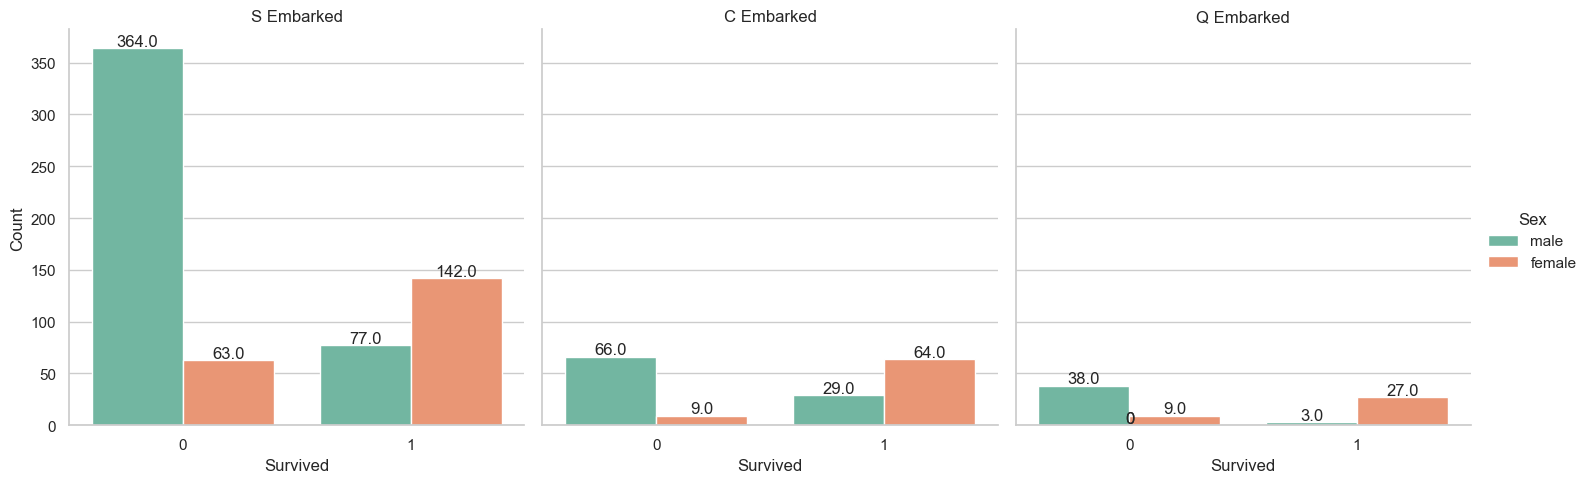

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y los colores
sns.set(style="whitegrid", palette="pastel")

# Crear el gráfico con segmentación por sexo
g = sns.catplot(x='Survived', col='Embarked', hue='Sex', kind='count', data=df_titanic, palette='Set2')

# Ajustar las etiquetas
g.set_axis_labels("Survived", "Count")
g.set_titles("{col_name} Embarked")

# Agregar etiquetas de recuento en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()


**Análisis de la Tasa de Supervivencia según punto de Embarque**

/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


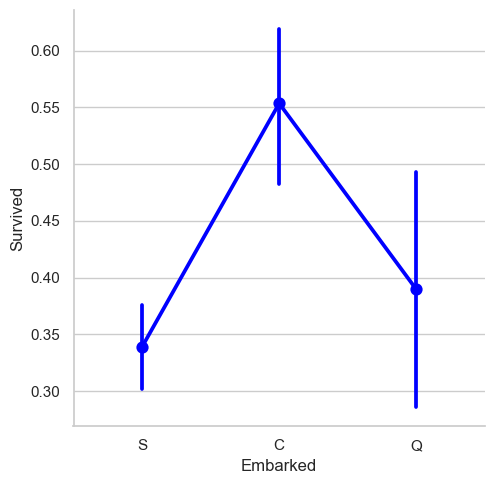

In [50]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=df_titanic, color='blue')


plt.show()

**Análisis:**

A pesar de que S fue el embarque más grande, no tuvo la tasa de sobrevivencia mayor, sino que fue el embarque C en Cherboug.
Pareciera que existe algun tipo de correlación entre la tasa de sobrevivientes y el embarque, al menos se puede ver una tendencia y también se nota que justo este embarque fue el que tuvo una mayor población femenina vs las otras.

**Análisis de supervivencia según grupos de edad**

/var/folders/30/v0ks7sw90rq6q2xy6h75vtqm0000gn/T/ipykernel_92668/3479952118.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Grupo A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] <= (i+1) * 10) & (df['Age_group'].isna()), 'Age_group'] = group_name
/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


  Age_group  Range  Count
0   Grupo A    0-9     64
1   Grupo B  10-19    115
2   Grupo C  20-29    407
3   Grupo D  30-39    155
4   Grupo E  40-49     86
5   Grupo F  50-59     42
6   Grupo G  60-69     17
7   Grupo H  70-79      5


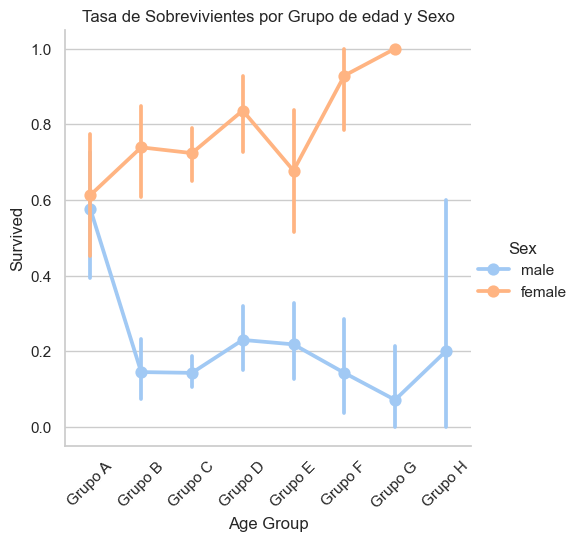

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crear grupos de edad
for df in [df_titanic]:
    df['Age_group'] = np.nan
    for i, group_name in enumerate(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E', 'Grupo F', 'Grupo G', 'Grupo H'], 0):
        df.loc[(df['Age'] <= (i+1) * 10) & (df['Age_group'].isna()), 'Age_group'] = group_name

# Calcular la cantidad de personas en cada grupo
age_group_counts = df_titanic['Age_group'].value_counts().sort_index()

# Crear un DataFrame con los rangos de edad y la cantidad de personas en cada grupo
age_group_info = pd.DataFrame({
    'Age_group': age_group_counts.index,
    'Range': [f'{i*10}-{(i+1)*10-1}' for i in range(len(age_group_counts))],
    'Count': age_group_counts.values
})

# Mostrar la tabla
print(age_group_info)

# Crear el gráfico
sns.catplot(x='Age_group', y='Survived', hue='Sex', kind='point', data=df_titanic, order=['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E', 'Grupo F', 'Grupo G', 'Grupo H'])



# Ajustar las etiquetas
plt.xlabel('Age Group')
plt.ylabel('Survived')
plt.title('Tasa de Sobrevivientes por Grupo de edad y Sexo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Análisis:**

Se realizó una agrupación por rangos de edad (10 años) para poder evaluar la tasa de sobrevivientes por cada rango de edad y sexo. De esto se pudo analizar que en infantes el indice de supervivencia fue casi el mismo, lo que tiene sentido dado que la prioridad de evacuación eran mujeres y niños y en los niños no fue tenido en cuenta su sexo para el protocolo.

En la población adulta si es distinto, ya que se nota una clara diferencia entre el sexo femenino y masculino y su tasa de sobrevivientes

#### **Preparación de los Datos**

In [52]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Age_group    891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Definición de los conjuntos de prueba y entrenamiento**

In [53]:
df_train_models = df_titanic.copy()
df_test_models = data_test_merged.copy()

In [54]:
df_train_models.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Grupo C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Grupo D
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Grupo C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Grupo D
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Grupo D


In [55]:
df_test_models.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Se lleva a cabo el proceso de transformación de las variables categóricas a numéricas en el **conjunto de entrenamiento**, para posteriormente empezar a trabajar los modelos de aprendizaje automático.

In [56]:
df_train_models = pd.get_dummies(df_train_models, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_models.drop(['PassengerId','Name','Ticket','Age_group'],axis=1,inplace=True)
df_train_models.dropna(inplace=True)

In [57]:
# Convertir la columna booleana a tipo de dato entero (0 para False, 1 para True)
df_train_models['Sex_male'] = df_train_models['Sex_male'].astype(int)
df_train_models['Embarked_Q'] = df_train_models['Embarked_Q'].astype(int)
df_train_models['Embarked_S'] = df_train_models['Embarked_S'].astype(int)
df_train_models['Pclass_2'] = df_train_models['Pclass_2'].astype(int)
df_train_models['Pclass_3'] = df_train_models['Pclass_3'].astype(int)



In [58]:
df_train_models.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Se lleva a cabo el proceso de transformación de las variables categóricas a numéricas en el **conjunto de prueba**, para posteriormente empezar a trabajar los modelos de aprendizaje automático.

In [59]:
df_test_models = pd.get_dummies(df_test_models, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_models.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test_models.dropna(inplace=True)

In [60]:
df_test_models.head(5)

,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,True,True,False,False,True
1,47.0,1,0,7.0000,1,False,False,True,False,True
2,62.0,0,0,9.6875,0,True,True,False,True,False
3,27.0,0,0,8.6625,0,True,False,True,False,True
4,22.0,1,1,12.2875,1,False,False,True,False,True


In [61]:
# Convertir la columna booleana a tipo de dato entero (0 para False, 1 para True)
df_test_models['Sex_male'] = df_test_models['Sex_male'].astype(int)
df_test_models['Embarked_Q'] = df_test_models['Embarked_Q'].astype(int)
df_test_models['Embarked_S'] = df_test_models['Embarked_S'].astype(int)
df_test_models['Pclass_2'] = df_test_models['Pclass_2'].astype(int)
df_test_models['Pclass_3'] = df_test_models['Pclass_3'].astype(int)

# Obtener la columna 'Survived' del DataFrame de prueba
survived_column = df_test_models['Survived']

# Eliminar la columna 'Survived' del DataFrame de prueba
df_test_models.drop('Survived', axis=1, inplace=True)

# Insertar la columna 'Survived' al principio del DataFrame de prueba
df_test_models.insert(0, 'Survived', survived_column)

In [62]:
df_test_models.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
